In [1]:
import pandas

In [2]:
pandas.__version__

'0.23.0'

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
data = pd.Series([2,5,2,3])#one-dimensional indexed array
data

0    2
1    5
2    2
3    3
dtype: int64

In [6]:
data.values

array([2, 5, 2, 3])

In [7]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [8]:
data[0]

2

In [9]:
data[2:3]

2    2
dtype: int64

In [10]:
data=pd.Series([2.11,0.25,3.9,5.22],
              index=['a','b','c','d'])#an explicit index function
data

a    2.11
b    0.25
c    3.90
d    5.22
dtype: float64

In [11]:
data['a':'b']#array-style slicing

a    2.11
b    0.25
dtype: float64

In [12]:
pd.Series(6,index=[100,200,400])#scalar

100    6
200    6
400    6
dtype: int64

In [14]:
pd.Series({1:'apple',2:'banana',3:'grapefruit'})

1         apple
2        banana
3    grapefruit
dtype: object

In [15]:
pd.Series({1:'apple',2:'banana',3:'grapefruit'},index=[3,1,2])

3    grapefruit
1         apple
2        banana
dtype: object

In [16]:
#dataframe, a generalization of a two-dimensional NumPy Array
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
                 'Florida': 170312, 'Illinois': 149995}
area=pd.Series(area_dict)

In [17]:
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [18]:
population_dict = {'California': 38332521,
                    'Texas': 26448193,
                    'New York': 19651127,
                    'Florida': 19552860,
                    'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [19]:
states=pd.DataFrame({'population':population,'area':area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [20]:
states.index #case name

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [21]:
states.columns #variable name

Index(['population', 'area'], dtype='object')

In [22]:
states['area']#return Series object containing in area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [28]:
#constructing dataframe objects from a single series obj
pd.DataFrame(population,columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [29]:
#from a list of dics
data=[{'a':i,"b":2*i,"c":i**2}
     for i in range(4)]
pd.DataFrame(data)

,a,b,c
0,0,0,0
1,1,2,1
2,2,4,4
3,3,6,9


In [31]:
pd.DataFrame([{"a":1,"b":2},{"b":3}])

,a,b
0,1.0,2
1,NaN,3


In [32]:
#from a dic of Series obj
pd.DataFrame({'population':population,
             'area':area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [34]:
#from a two dimensional NumPy array
pd.DataFrame(np.random.rand(3,2),
            columns=['foo','bar'],
            index=['a','b','c'])

,foo,bar
a,0.689476,0.120011
b,0.163904,0.228957
c,0.754404,0.287905


In [35]:
#from a Numpy structred array
X=np.zeros(3,dtype=[("name","i8"),("postcode",'f8')])
X

array([(0, 0.), (0, 0.), (0, 0.)],
      dtype=[('name', '<i8'), ('postcode', '<f8')])

In [37]:
pd.DataFrame(X)

,name,postcode
0,0,0.0
1,0,0.0
2,0,0.0


In [38]:
#index
ind=pd.Index([2,4,1,6])

In [39]:
ind

Int64Index([2, 4, 1, 6], dtype='int64')

In [40]:
ind[1]

4

In [41]:
ind[::3]#start from 0, with a step of 3

Int64Index([2, 6], dtype='int64')

In [42]:
print(ind.size, ind.shape, ind.ndim,ind.dtype)#attributes

4 (4,) 1 int64


In [44]:
#index is immutable
indA=pd.Index([2,5,7,8,9])
indB=pd.Index([1,2,6,7,10])
indA & indB

Int64Index([2, 7], dtype='int64')

In [45]:
indA|indB

Int64Index([1, 2, 5, 6, 7, 8, 9, 10], dtype='int64')

In [46]:
indA^indB #symmetric diff

Int64Index([1, 5, 6, 8, 9, 10], dtype='int64')

In [47]:
#indexing and selection
#series as dict
data=pd.Series([2,5,7,8,10],index=['a','b','c','d','e'])
data

a     2
b     5
c     7
d     8
e    10
dtype: int64

In [48]:
data['a']

2

In [49]:
"a"in data

True

In [50]:
data.keys()

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [51]:
list(data.items())

[('a', 2), ('b', 5), ('c', 7), ('d', 8), ('e', 10)]

In [52]:
data['f']=100 #add a new value

In [53]:
data

a      2
b      5
c      7
d      8
e     10
f    100
dtype: int64

In [54]:
#series as one-dimensional array
data['a':'c']#slicing

a    2
b    5
c    7
dtype: int64

In [55]:
data[0:2]#implicit index, final index is not included 

a    2
b    5
dtype: int64

In [57]:
data[(data>5)&(data<3)]#masking

Series([], dtype: int64)

In [58]:
data[["a","c"]]#fancy indexing

a    2
c    7
dtype: int64

In [60]:
#note that if you index is number, indexing operation will use the number/explicit index, slicing uses implicit ones
data.loc['a'] #always refer to explicit ones 

2

In [61]:
data.iloc[1]#implicit index

5

In [62]:
#selection in dataframe
pd.DataFrame({'population':population,
             'area':area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [64]:
data=pd.DataFrame({'population':population,
             'area':area})

In [65]:
data['area'] #dic style

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [66]:
data.area #attribute style

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [67]:
data['density']=data['population']/data['area']

In [68]:
data

,population,area,density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


In [69]:
data.values

array([[3.83325210e+07, 4.23967000e+05, 9.04139261e+01],
       [2.64481930e+07, 6.95662000e+05, 3.80187404e+01],
       [1.96511270e+07, 1.41297000e+05, 1.39076746e+02],
       [1.95528600e+07, 1.70312000e+05, 1.14806121e+02],
       [1.28821350e+07, 1.49995000e+05, 8.58837628e+01]])

In [70]:
data.T #transpose

,California,Texas,New York,Florida,Illinois
population,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [71]:
data.values[0]

array([3.83325210e+07, 4.23967000e+05, 9.04139261e+01])

In [72]:
data.iloc[:3,:2]

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297


In [74]:
data.loc[:'Illinois',:'area']

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [75]:
data.ix[:3,:"area"]#hybrid of the implicit and explict indexing 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297


In [76]:
data.loc[data.density>100,['population','density']]

,population,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [79]:
data.iloc[1,2]=90
data

,population,area,density
California,38332521,423967,90.413926
Texas,26448193,695662,90.000000
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


In [80]:
data[1:3]#slicings, maskings often refer to rows

,population,area,density
Texas,26448193,695662,90.000000
New York,19651127,141297,139.076746


In [84]:
data.area #column wise

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [86]:
#operation 
rng=np.random.RandomState(42)
ser=pd.Series(rng.randint(0,10,4))

In [87]:
ser

0    6
1    3
2    7
3    4
dtype: int64

In [90]:
df=pd.DataFrame(rng.randint(0,10,(3,4)),
               columns=["a",'b','c','d'])

In [91]:
df

,a,b,c,d
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [92]:
np.exp(ser) #the output is still a pandas project

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [93]:
A = pd.Series([2, 4, 6], index=[0, 1, 2]) 
B = pd.Series([1, 3, 5], index=[1, 2, 3]) 
A+B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [94]:
A.add(B,fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [6]:
#June20
#index alignment
import pandas as pd
import numpy as np

In [8]:
rng=np.random.RandomState(42)#random is a function built in Numpy
A=pd.DataFrame(rng.randint(0,20,(2,2)),
            columns=list('AB'))
A

,A,B
0,6,19
1,14,10


In [9]:
B=pd.DataFrame(rng.randint(0,10,(3,3)),
              columns=list('CAB'))
B

,C,A,B
0,7,4,6
1,9,2,6
2,7,4,3


In [10]:
A+B #A, B, C columns will add up correspondinly 

,A,B,C
0,10.0,25.0,NaN
1,16.0,16.0,NaN
2,NaN,NaN,NaN


In [14]:
fill=A.stack().mean()#first compute mean of row mean in A (16+9)/2
fill

12.25

In [15]:
A.add(B,fill_value=fill)#add 12.25 to each NaN and the value in B

,A,B,C
0,10.00,25.00,19.25
1,16.00,16.00,21.25
2,16.25,15.25,19.25


In [16]:
A = rng.randint(10, size=(3, 4))
A

array([[7, 7, 2, 5],
       [4, 1, 7, 5],
       [1, 4, 0, 9]])

In [18]:
A-A[0] #subtract A[0] from each cell

array([[ 0,  0,  0,  0],
       [-3, -6,  5,  0],
       [-6, -3, -2,  4]])

In [20]:
A=pd.DataFrame(A)

In [21]:
A-A.iloc[0]

,0,1,2,3
0,0,0,0,0
1,-3,-6,5,0
2,-6,-3,-2,4


In [26]:
A.subtract(A[1],axis=0)#specify column-wise operation, by "axis=0"

,0,1,2,3
0,0,0,-5,-2
1,3,0,6,4
2,-3,0,-4,5


In [31]:
A

,0,1,2,3
0,7,7,2,5
1,4,1,7,5
2,1,4,0,9


In [33]:
halfA=A.iloc[1,::3]#1 indicates start from row 1, 3 indicates with 3 steps
halfA

0    4
3    5
Name: 1, dtype: int64

In [29]:
A

,0,1,2,3
0,7,7,2,5
1,4,1,7,5
2,1,4,0,9


In [34]:
#handling missing data
#masking approach, using Boolean array
#sentinel approach, using rare values such as -9999 or NaN
#sentinel value: None
vals1=np.array([1,None,3])
vals1#note that operation speed of python object is slow, and non-oper

array([1, None, 3], dtype=object)

In [37]:
vals2=np.array([1,np.nan,3])
vals2.dtype #nan missing numerical data

dtype('float64')

In [38]:
vals2.sum(),vals2.min()

(nan, nan)

In [39]:
np.nansum(vals2)#ignore the nan

4.0

In [40]:
pd.Series([1,'apple',np.nan,None])

0        1
1    apple
2      NaN
3     None
dtype: object

In [41]:
pd.Series([1,9,np.nan,None])

0    1.0
1    9.0
2    NaN
3    NaN
dtype: float64

In [43]:
x=pd.Series(range(2),dtype=int)
x

0    0
1    1
dtype: int64

In [44]:
x[0]=None
x #note that the datatype will be changed into floating point

0    NaN
1    1.0
dtype: float64

In [50]:
x.isnull()

0     True
1    False
dtype: bool

In [51]:
x.notnull()

0    False
1     True
dtype: bool

In [52]:
x.dropna()

1    1.0
dtype: float64

In [53]:
x.fillna(5)

0    5.0
1    1.0
dtype: float64

In [54]:
x[x.notnull()]

1    1.0
dtype: float64

In [56]:
df=pd.DataFrame([[1,np.nan,2],
               [np.nan,3,4],
               [np.nan,5,np.nan]])
df

,0,1,2
0,1.0,NaN,2.0
1,NaN,3.0,4.0
2,NaN,5.0,NaN


In [57]:
df.dropna()#drop everything

,0,1,2


In [58]:
df.dropna(axis='columns')

""
0
1
2


In [59]:
df[0]=np.nan
df

,0,1,2
0,NaN,NaN,2.0
1,NaN,3.0,4.0
2,NaN,5.0,NaN


In [60]:
df.dropna(axis='columns',how="all")#drop if all are none

,1,2
0,NaN,2.0
1,3.0,4.0
2,5.0,NaN


In [62]:
df.dropna(axis='columns',thresh=2)#drop if there are more than 2 null values

,1,2
0,NaN,2.0
1,3.0,4.0
2,5.0,NaN


In [63]:
df.fillna(0)

,0,1,2
0,0.0,0.0,2.0
1,0.0,3.0,4.0
2,0.0,5.0,0.0


In [64]:
df.fillna(method='ffill')#fill with the previous values in previous row

,0,1,2
0,NaN,NaN,2.0
1,NaN,3.0,4.0
2,NaN,5.0,4.0


In [65]:
df.fillna(method="bfill")

,0,1,2
0,NaN,3.0,2.0
1,NaN,3.0,4.0
2,NaN,5.0,NaN


In [66]:
df.fillna(method='ffill',axis=1)#previous column

,0,1,2
0,NaN,NaN,2.0
1,NaN,3.0,4.0
2,NaN,5.0,5.0


In [81]:
#hierarchical indexing 
index=[('task1',2001),('task1',2003),('task2',2001),('task2',2003),('task3',2001),('task3',2003)]
name=['reading', 'workout','programming','sleeping','clubbing','drawing']

In [82]:
index=pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['task1', 'task2', 'task3'], [2001, 2003]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [83]:
name=pd.Series(name,index=index)

In [84]:
name=name.reindex(index)

In [85]:
name

task1  2001        reading
       2003        workout
task2  2001    programming
       2003       sleeping
task3  2001       clubbing
       2003        drawing
dtype: object

In [86]:
name[:,2001]

task1        reading
task2    programming
task3       clubbing
dtype: object

In [90]:
name['task2']

2001    programming
2003       sleeping
dtype: object

In [91]:
name_df=name.unstack()#break the hierarchy 
name_df

,2001,2003
task1,reading,workout
task2,programming,sleeping
task3,clubbing,drawing


In [92]:
name_df.stack()

task1  2001        reading
       2003        workout
task2  2001    programming
       2003       sleeping
task3  2001       clubbing
       2003        drawing
dtype: object

In [93]:
name_df=pd.DataFrame({'content':name,
                     'interesting level':[1,2,3,4,5,5]})

In [94]:
name_df

content  interesting level
task1 2001      reading                  1
      2003      workout                  2
task2 2001  programming                  3
      2003     sleeping                  4
task3 2001     clubbing                  5
      2003      drawing                  5

In [98]:
df=pd.DataFrame(np.random.rand(4,2),#pass multple indexes
               index=[['A',"B","B","A"],[1,2,1,2]],
               columns=['semester1','semester2'])

In [99]:
df

semester1  semester2
A 1   0.161547   0.670309
B 2   0.780842   0.592967
  1   0.965964   0.424841
A 2   0.206088   0.033246

In [100]:
#more explicit way of constructing multi-index #from array
pd.MultiIndex.from_arrays([['a','a','b','b'],[1,2,1,2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [101]:
pd.MultiIndex.from_tuples([('a',1),('a',2),("b",1),('b',2)])#from tuple

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [102]:
pd.MultiIndex.from_product([['a','b'],[1,2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [103]:
pd.MultiIndex(levels=[['a','b'],[1,2]],
             labels=[[0,0,1,1],[0,1,0,1]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [107]:
name.index.names=['task','year']#assign name to index, 
#note that reading partis value

In [105]:
name

task   year
task1  2001        reading
       2003        workout
task2  2001    programming
       2003       sleeping
task3  2001       clubbing
       2003        drawing
dtype: object

In [109]:
#multi-index for column
index=pd.MultiIndex(levels=[['Tom','Molly'],[1,2]],
             labels=[[0,0,1,1],[0,1,0,1]])
columns=pd.MultiIndex(levels=[['spring','fall'],[1,2]],
                             labels=[[0,0,1,1],[0,1,0,1]])
index

MultiIndex(levels=[['Tom', 'Molly'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [110]:
data=np.round(np.random.randn(4,4),1)

In [111]:
test=pd.DataFrame(data,index=index,columns=columns)
test

spring      fall     
             1    2    1    2
Tom   1    2.0  2.4 -0.3  0.4
      2    0.4 -0.5 -1.3 -0.6
Molly 1    0.4 -0.6  2.3 -1.4
      2    0.5 -0.6 -0.1  0.7

In [114]:
test['spring']

1    2
Tom   1  2.0  2.4
      2  0.4 -0.5
Molly 1  0.4 -0.6
      2  0.5 -0.6

In [118]:
test[::2]

spring      fall     
             1    2    1    2
Tom   1    2.0  2.4 -0.3  0.4
Molly 1    0.4 -0.6  2.3 -1.4

In [119]:
test[1::2]

spring      fall     
             1    2    1    2
Tom   2    0.4 -0.5 -1.3 -0.6
Molly 2    0.5 -0.6 -0.1  0.7

In [122]:
test[test>0]

spring      fall     
             1    2    1    2
Tom   1    2.0  2.4  NaN  0.4
      2    0.4  NaN  NaN  NaN
Molly 1    0.4  NaN  2.3  NaN
      2    0.5  NaN  NaN  0.7

In [125]:
test.iloc[1]#column is primary

spring  1    0.4
        2   -0.5
fall    1   -1.3
        2   -0.6
Name: (Tom, 2), dtype: float64

In [129]:
idx=pd.IndexSlice #will be more convenient for slicing multi-index df

In [134]:
test.loc[idx[:,2],idx[:,2]]

,,spring,fall
,,2,2
Tom,2,-0.5,-0.6
Molly,2,-0.6,0.7


In [136]:
#most slicing operations will fail if index is not sorted
test=test.sort_index()
test

spring      fall     
             1    2    1    2
Molly 1    0.4 -0.6  2.3 -1.4
      2    0.5 -0.6 -0.1  0.7
Tom   1    2.0  2.4 -0.3  0.4
      2    0.4 -0.5 -1.3 -0.6

In [137]:
test.unstack(level=0)

spring                  fall                
       1          2          1          2     
   Molly  Tom Molly  Tom Molly  Tom Molly  Tom
1    0.4  2.0  -0.6  2.4   2.3 -0.3  -1.4  0.4
2    0.5  0.4  -0.6 -0.5  -0.1 -1.3   0.7 -0.6

In [138]:
test.unstack(level=1)

spring                fall               
           1         2         1         2     
           1    2    1    2    1    2    1    2
Molly    0.4  0.5 -0.6 -0.6  2.3 -0.1 -1.4  0.7
Tom      2.0  0.4  2.4 -0.5 -0.3 -1.3  0.4 -0.6

In [139]:
test.unstack().stack()

spring      fall     
             1    2    1    2
Molly 1    0.4 -0.6  2.3 -1.4
      2    0.5 -0.6 -0.1  0.7
Tom   1    2.0  2.4 -0.3  0.4
      2    0.4 -0.5 -1.3 -0.6

In [142]:
test_flat=test.reset_index()

In [143]:
test_flat

level_0 level_1 spring      fall     
                       1    2    1    2
0   Molly       1    0.4 -0.6  2.3 -1.4
1   Molly       2    0.5 -0.6 -0.1  0.7
2     Tom       1    2.0  2.4 -0.3  0.4
3     Tom       2    0.4 -0.5 -1.3 -0.6

In [152]:
test

spring      fall     
             1    2    1    2
Molly 1    0.4 -0.6  2.3 -1.4
      2    0.5 -0.6 -0.1  0.7
Tom   1    2.0  2.4 -0.3  0.4
      2    0.4 -0.5 -1.3 -0.6

In [153]:
test_mean=test.mean(level=0)

In [154]:
test_mean

spring       fall      
           1     2    1     2
Molly   0.45 -0.60  1.1 -0.35
Tom     1.20  0.95 -0.8 -0.10

In [155]:
test_mean.mean(axis=1,level=1)

,1,2
Molly,0.775,-0.475
Tom,0.200,0.425


In [157]:
def make_df(cols, ind):
    data={c:[str(c)+str(i)for i in ind]
         for c in cols}
    return pd.DataFrame(data,ind)
make_df('ABC',range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [158]:
#concat
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])#concat series

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [159]:
#concat dataframe
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1); print(df2); print(pd.concat([df1, df2]))#row wise by default


    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [161]:
print(pd.concat([df1, df2],axis=1))

     A    B    A    B
1   A1   B1  NaN  NaN
2   A2   B2  NaN  NaN
3  NaN  NaN   A3   B3
4  NaN  NaN   A4   B4


In [163]:
df1.index=df2.index #duplicate the indices

In [164]:
print(pd.concat([df1, df2],axis='columns'))

    A   B   A   B
3  A1  B1  A3  B3
4  A2  B2  A4  B4


In [166]:
print(pd.concat([df1, df2],ignore_index=True))#ignore the original index

    A   B
0  A1  B1
1  A2  B2
2  A3  B3
3  A4  B4


In [168]:
print(pd.concat([df1, df2],keys=['df1','df2']))#have a higher hierarchy 

        A   B
df1 3  A1  B1
    4  A2  B2
df2 3  A3  B3
    4  A4  B4


In [169]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])

In [170]:
print(df5);print(df6)

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4


In [172]:
print(pd.concat([df5, df6]))

     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [173]:
print(pd.concat([df5, df6],join='inner'))#intersection

    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [175]:
print(pd.concat([df5, df6], join_axes=[df5.columns]))#column in df5 remained

     A   B   C
1   A1  B1  C1
2   A2  B2  C2
3  NaN  B3  C3
4  NaN  B4  C4


In [176]:
df5.append(df6)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


In [177]:
#one to one joins
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]}) 
print(df1); print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [178]:
df3=pd.merge(df1,df2) #join based on the employee name regardless of index

In [179]:
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [180]:
#many-to-one joins
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
print(df4)

         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve


In [181]:
pd.merge(df3,df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [182]:
pd.merge(df4,df3)

,group,supervisor,employee,hire_date
0,Accounting,Carly,Bob,2008
1,Engineering,Guido,Jake,2012
2,Engineering,Guido,Lisa,2004
3,HR,Steve,Sue,2014


In [186]:
#many-to-many joins
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                                     'Engineering', 'Engineering', 'HR', 'HR'],
                           'skills': ['math', 'spreadsheets', 'coding', 'linux',
                                      'spreadsheets', 'organization']})
print(df5)

         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization


In [187]:
print(df1)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR


In [189]:
pd.merge(df1,df5) #both the left and right array contains duplicates

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


In [190]:
print(pd.merge(df1,df2,on='employee'))

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


In [191]:
print(pd.merge(df1,df2))

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


In [192]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]}) 
print(df1); print(df3);

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000


In [193]:
print(pd.merge(df1, df3, left_on="employee", right_on="name")) #name=employee

  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [195]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [196]:
df1a = df1.set_index('employee') 
df2a = df2.set_index('employee') 
print(df1a); print(df2a)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [197]:
print(pd.merge(df1a, df2a, left_index=True, right_index=True))#key is index

                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [198]:
#join - defaults to joining on indices
print(df1a.join(df2a))

                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [199]:
print(df1a); print(df3);#merge index and columns

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000


In [200]:
print(pd.merge(df1a, df3, left_index=True, right_on='name'))


         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000


In [204]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink']) 
print(df6); print(df7); print(pd.merge(df6, df7))#simple join will only have Mary


    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
   name   food drink
0  Mary  bread  wine


In [205]:
pd.merge(df6, df7, how='inner')#inner join default

,name,food,drink
0,Mary,bread,wine


In [206]:
print(pd.merge(df6, df7, how='outer'))#will include all

     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer


In [207]:
print(pd.merge(df6, df7, how='left'))#join according to the left

    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine


In [208]:
print(pd.merge(df6, df7, how='right'))

     name   food drink
0    Mary  bread  wine
1  Joseph    NaN  beer


In [209]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})

In [210]:
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})

In [211]:
print(pd.merge(df8, df9, on="name"))#have conflict content

   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


In [212]:
print(pd.merge(df8, df9, on="name", suffixes=["_L", "_R"]))#give a suff

   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


In [214]:
pop=pd.read_csv('/Users/shuninglu/desktop/state-population.csv')

In [216]:
abbrevs=pd.read_csv('/Users/shuninglu/desktop/state-abbrevs.csv')
areas=pd.read_csv('/Users/shuninglu/desktop/state-areas.csv')

In [217]:
print(pop.head());print(areas.head());print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [222]:
merged=pd.merge(pop,abbrevs,how='outer',
                left_on="state/region", right_on="abbreviation").drop('abbreviation',axis=1)

In [223]:
print(merged.head())

  state/region     ages  year  population    state
0           AL  under18  2012   1117489.0  Alabama
1           AL    total  2012   4817528.0  Alabama
2           AL  under18  2010   1130966.0  Alabama
3           AL    total  2010   4785570.0  Alabama
4           AL  under18  2011   1125763.0  Alabama


In [226]:
merged.isnull().any()#check if there is any n.a. 

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [230]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [231]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [232]:
final = pd.merge(merged, areas, on='state', how='left')

In [233]:
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [234]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [235]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [237]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [238]:
import numexpr

In [239]:
data2010=final.query("year==2010&ages=='total'")

In [241]:
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [242]:
data2010.set_index('state', inplace=True)#index setting
density = data2010['population'] / data2010['area (sq. mi)']

In [243]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [244]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

In [2]:
#p158
import seaborn as sns

In [4]:
planet=sns.load_dataset('planets')

In [6]:
planet.shape

(1035, 6)

In [7]:
planet.head

<bound method NDFrame.head of                method  number  orbital_period    mass  distance  year
0     Radial Velocity       1      269.300000   7.100     77.40  2006
1     Radial Velocity       1      874.774000   2.210     56.95  2008
2     Radial Velocity       1      763.000000   2.600     19.84  2011
3     Radial Velocity       1      326.030000  19.400    110.62  2007
4     Radial Velocity       1      516.220000  10.500    119.47  2009
5     Radial Velocity       1      185.840000   4.800     76.39  2008
6     Radial Velocity       1     1773.400000   4.640     18.15  2002
7     Radial Velocity       1      798.500000     NaN     21.41  1996
8     Radial Velocity       1      993.300000  10.300     73.10  2008
9     Radial Velocity       2      452.800000   1.990     74.79  2010
10    Radial Velocity       2      883.000000   0.860     74.79  2010
11    Radial Velocity       1      335.100000   9.880     39.43  2009
12    Radial Velocity       1      479.100000   3.880     97

In [8]:
import numpy as np

In [9]:
import pandas as pd

In [11]:
rng=np.random.RandomState(42)

In [12]:
ser=pd.Series(rng.rand(5))

In [13]:
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [14]:
ser.sum()

2.811925491708157

In [15]:
ser.mean()

0.5623850983416314

In [16]:
df=pd.DataFrame({'A':rng.rand(6),
                'B':rng.rand(6)})
df

,A,B
0,0.155995,0.969910
1,0.058084,0.832443
2,0.866176,0.212339
3,0.601115,0.181825
4,0.708073,0.183405
5,0.020584,0.304242


In [17]:
df.mean()#aggregate by column, column is always by default in datafrome

A    0.401671
B    0.447361
dtype: float64

In [18]:
df.mean(axis=0) #aggregate by column

A    0.401671
B    0.447361
dtype: float64

In [19]:
df.mean(axis=1) #aggregate by row

0    0.562952
1    0.445263
2    0.539258
3    0.391470
4    0.445739
5    0.162413
dtype: float64

In [22]:
df.mean(axis='columns') #aggregage by row

0    0.562952
1    0.445263
2    0.539258
3    0.391470
4    0.445739
5    0.162413
dtype: float64

In [23]:
df.describe()#a much easier way to get the summaries by column

,A,B
count,6.000000,6.000000
mean,0.401671,0.447361
std,0.366895,0.357000
min,0.020584,0.181825
25%,0.082561,0.190638
50%,0.378555,0.258291
75%,0.681333,0.700393
max,0.866176,0.969910


In [24]:
planet.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [26]:
df.count()

A    6
B    6
dtype: int64

In [34]:
df.std()

A    0.366895
B    0.357000
dtype: float64

In [37]:
df.prod()

A    0.000069
B    0.001739
dtype: float64

In [38]:
df.sum()

A    2.410026
B    2.684163
dtype: float64

In [40]:
planet.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [53]:
#groupby 
df=pd.DataFrame({'key':['A','B','C','A','B','C'],
               'data':range(6)},columns=['key','data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [54]:
df.groupby('key')

In [55]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [56]:
planet.groupby('method')

In [57]:
planet.groupby('method').median()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,1.0,631.180000,NaN,17.875,2011.5
Eclipse Timing Variations,2.0,4343.500000,5.125,315.360,2010.0
Imaging,1.0,27500.000000,NaN,40.395,2009.0
Microlensing,1.0,3300.000000,NaN,3840.000,2010.0
Orbital Brightness Modulation,2.0,0.342887,NaN,1180.000,2011.0
Pulsar Timing,3.0,66.541900,NaN,1200.000,1994.0
Pulsation Timing Variations,1.0,1170.000000,NaN,NaN,2007.0
Radial Velocity,1.0,360.200000,1.260,40.445,2009.0
Transit,1.0,5.714932,1.470,341.000,2012.0


In [58]:
planet.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [62]:
for (method,group) in planet.groupby('method'):#interate over the grouops, and return shape
    print('{0:30s} shape={1}'.format(method,group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [63]:
planet.groupby('method')['year'].describe().unstack()#dispatch method

       method                       
count  Astrometry                          2.000000
       Eclipse Timing Variations           9.000000
       Imaging                            38.000000
       Microlensing                       23.000000
       Orbital Brightness Modulation       3.000000
       Pulsar Timing                       5.000000
       Pulsation Timing Variations         1.000000
       Radial Velocity                   553.000000
       Transit                           397.000000
       Transit Timing Variations           4.000000
mean   Astrometry                       2011.500000
       Eclipse Timing Variations        2010.000000
       Imaging                          2009.131579
       Microlensing                     2009.782609
       Orbital Brightness Modulation    2011.666667
       Pulsar Timing                    1998.400000
       Pulsation Timing Variations      2007.000000
       Radial Velocity                  2007.518987
       Transit             

In [64]:
planet.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [65]:
rng=np.random.RandomState(42)
df=pd.DataFrame({'key':['A','B','C','A','B','C'],
                'data1':range(6),
                'data2':rng.randint(0,10,6)},
               columns=['key','data1','data2'])

In [66]:
df

,key,data1,data2
0,A,0,6
1,B,1,3
2,C,2,7
3,A,3,4
4,B,4,6
5,C,5,9


In [67]:
df.groupby('key').aggregate(['min',np.median,max])#note the three expression in agg

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     4    5.0   6
B       1    2.5   4     3    4.5   6
C       2    3.5   5     7    8.0   9

In [68]:
df.groupby('key').aggregate({'data1':'min',
                            'data2':'max'})#pass to a dictionary

,data1,data2
key,,
A,0,6
B,1,6
C,2,9


In [71]:
def filter_func(x):
    return x['data2'].std()>2 #define a filter function
print(df);print(df.groupby('key').std());
print(df.groupby('key').filter(filter_func))#apply the filter function as a filter 

  key  data1  data2
0   A      0      6
1   B      1      3
2   C      2      7
3   A      3      4
4   B      4      6
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  2.121320
C    2.12132  1.414214
  key  data1  data2
1   B      1      3
4   B      4      6


In [73]:
df.groupby('key').transform(lambda x: x-x.mean())#centering the data

,data1,data2
0,-1.5,1.0
1,-1.5,-1.5
2,-1.5,-1.0
3,1.5,-1.0
4,1.5,1.5
5,1.5,1.0


In [74]:
def norm_by_data2(x):
    x['data1']/=x['data2'].sum()
    return x
print(df);print(df.groupby('key').apply(norm_by_data2))#apply the function you defined

  key  data1  data2
0   A      0      6
1   B      1      3
2   C      2      7
3   A      3      4
4   B      4      6
5   C      5      9
  key     data1  data2
0   A  0.000000      6
1   B  0.111111      3
2   C  0.125000      7
3   A  0.300000      4
4   B  0.444444      6
5   C  0.312500      9


In [76]:
L=[0,0,0,0,0,0]#pass all values in data1, data2, respectively to 0
print(df.groupby(L).sum())

   data1  data2
0     15     35


In [77]:
L=[1,1,1,1,1,1]
print(df.groupby(L).sum())

   data1  data2
1     15     35


In [78]:
L=[1,0,0,0,0,0] #pass the first row to 1, rest to 0, L becomes new index
print(df.groupby(L).sum())

   data1  data2
0     15     29
1      0      6


In [80]:
L=[2,1,1,1,1,1]
print(df.groupby(L).sum())

   data1  data2
1     15     29
2      0      6


In [81]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
print(df2); print(df2.groupby(mapping).sum())

     data1  data2
key              
A        0      6
B        1      3
C        2      7
A        3      4
B        4      6
C        5      9
           data1  data2
consonant     12     25
vowel          3     10


In [83]:
print(df2.groupby(str.lower).mean())#pass function in groupby, the new value is mean

   data1  data2
a    1.5    5.0
b    2.5    4.5
c    3.5    8.0


In [84]:
df2.groupby([str.lower, mapping]).mean()#have two indices

,,data1,data2
a,vowel,1.5,5.0
b,consonant,2.5,4.5
c,consonant,3.5,8.0


In [85]:
decade = 10 * (planet['year'] // 10)

In [86]:
decade = decade.astype(str) + 's'
decade.name='decade'

In [90]:
planet.groupby(['method',decade])['number'].sum().unstack().fillna(0)
#"method"is the agg index, decade in the column, number is the criterion for summation

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


In [91]:
#Pivot Tables
titanic = sns.load_dataset('titanic')

In [94]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [97]:
titanic.groupby('sex')['survived'].sum()

sex
female    233
male      109
Name: survived, dtype: int64

In [98]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()
#in this case, the code is very long,so pivot table is helpful, more multi-index grouping

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [100]:
titanic.pivot_table('survived',index='sex',columns='class')
#more straightforward, mean by default

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [105]:
age=pd.cut(titanic['age'],[0,18,80])#split into subgroup
titanic.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (18, 80]  0.909091  1.000000  0.511628
       NaN       0.972973  0.900000  0.423729
male   (18, 80]  0.800000  0.600000  0.215686
       NaN       0.375000  0.071429  0.133663

In [106]:
fare=pd.qcut(titanic['fare'],2)#cut into the second quantile
titanic.pivot_table('survived',['sex',age],[fare,'class'])#add one more set of column

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (18, 80]              NaN  1.000000  0.714286          0.909091   
       NaN                   NaN  0.880000  0.444444          0.972973   
male   (18, 80]              NaN  0.000000  0.260870          0.800000   
       NaN                   0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (18, 80]  1.000000  0.318182  
       NaN       0.914286  0.391304  
male   (18, 80]  0.818182  0.178571  
       NaN       0.030303  0.192308

In [107]:
#DataFrame.pivot_table(data, values=None, index=None, columns=None,
                         # aggfunc='mean', fill_value=None, margins=False,
                         # dropna=True, margins_name='All')
titanic.pivot_table(index='sex',columns='class',
                   aggfunc={'survived':sum,'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [109]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True,margins_name='Total')

class,First,Second,Third,Total
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
Total,0.629630,0.472826,0.242363,0.383838


In [110]:
#more examples, below is the example of reading data online

curl: Remote file name has no length!
curl: try 'curl --help' or 'curl --manual' for more information


In [111]:
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  258k  100  258k    0     0  1230k      0 --:--:-- --:--:-- --:--:-- 1230k


In [112]:
births=pd.read_csv('births.csv')

In [113]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [115]:
births['decade']=10*(births['year']//10)

In [116]:
births.pivot_table('births',index='decade',columns='gender',aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [117]:
%matplotlib inline
import matplotlib.pyplot as plt

In [119]:
sns.set()

Text(0,0.5,'total births per year')

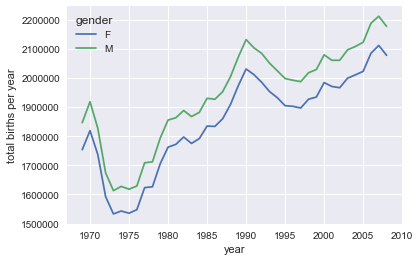

In [120]:
#plot pivot table
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot() 
plt.ylabel('total births per year')

In [122]:
#robust sigma-clipping operation
quantiles=np.percentile(births['births'],[25,50,75])
mu=quantiles[1]#mu is the first 25%
sig=0.74*(quantiles[2]-quantiles[0])#robust estimate of the sample mean,0.74 is from the range in Gaussian dist
births=births.query('(births>@mu-5*@sig)&(births<@mu+5*@sig)')#filter rows outside the values

In [124]:
births['day']=births['day'].astype(int)#reset the index type

In [126]:
#create a daytime index from year, month, day
births.index=pd.to_datetime(10000*births.year+
                           100*births.month+
                           births.day,format='%Y%m%d')
births['dayofweek']=births.index.dayofweek#recode the day in the index into day of week

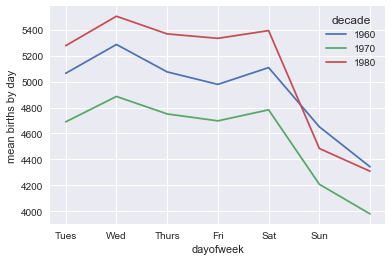

In [127]:
births.pivot_table('births', index='dayofweek', 
                   columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [128]:
births_by_date=births.pivot_table('births',
                                 [births.index.month,births.index.day])

In [130]:
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [131]:
births_by_date.index = [pd.datetime(2012, month, day)
                       for (month, day) in births_by_date.index]#use datetime to recode month and day in the bbd df

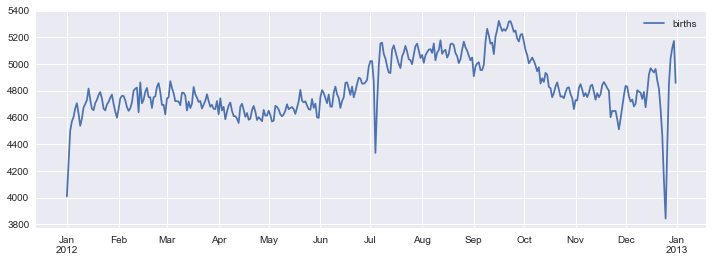

In [132]:
fig,ax=plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)

In [133]:
#string function
data = ['peter', 'Paul', 'MARY', 'gUIDO'] 
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [134]:
names=pd.Series(data)

In [135]:
names[5]= None

In [136]:
names

0    peter
1     Paul
2     MARY
3    gUIDO
5     None
dtype: object

In [137]:
names.str.capitalize()

0    Peter
1     Paul
2     Mary
3    Guido
5     None
dtype: object

In [138]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [139]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [141]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [142]:
#extract the first name

In [143]:
monte.str.extract('([A-Za-z]+)')

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


In [144]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')#names starting and ending with a consonant

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

In [145]:
monte.str.findall(r'^[AEIOU].*[aeiou]$')#name starting and edning with aeiou

0             []
1             []
2             []
3    [Eric Idle]
4             []
5             []
dtype: object

In [148]:
monte.str.slice(2)

0    aham Chapman
1       hn Cleese
2     rry Gilliam
3         ic Idle
4       rry Jones
5     chael Palin
dtype: object

In [149]:
monte.str.cat()

'Graham ChapmanJohn CleeseTerry GilliamEric IdleTerry JonesMichael Palin'

In [153]:
monte.str.split().str.get(-1)#get the last name, get(-1), split what you have got

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [154]:
monte.str.split().str.get(0)#get the first names

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

In [155]:
full_monte=pd.DataFrame({'name':monte,
                        'info':['B|C|D','B|D','A|C','B|D','B|C','B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [156]:
full_monte['info'].str.get_dummies('|')#quickly split into multiple columns

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


In [8]:
#example open recipe dataset no longer exist
#working with time-series data
from datetime import datetime
datetime(year=2018,month=6,day=21)


datetime.datetime(2018, 6, 21, 0, 0)

In [9]:
from dateutil import parser #parse date from string
date=parser.parse("4th of June, 2018")
date

datetime.datetime(2018, 6, 4, 0, 0)

In [10]:
date.strftime('%A')

'Monday'

In [13]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64) 
date

array('2015-07-04', dtype='datetime64[D]')

In [14]:
date+np.arange(10)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13'], dtype='datetime64[D]')

In [15]:
date = pd.to_datetime("4th of July, 2015") 
date

Timestamp('2015-07-04 00:00:00')

In [18]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [19]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                        '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [20]:
data['2014']#so cool..

2014-07-04    0
2014-08-04    1
dtype: int64

In [21]:
data['2014':'2015']

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [31]:
#timeindex, periodindex, timedeltaindex
data=pd.to_datetime([datetime(2015,7,3),'4th of July,2011'])

In [32]:
data

DatetimeIndex(['2015-07-03', '2011-07-04'], dtype='datetime64[ns]', freq=None)

In [33]:
data.to_period('D')

PeriodIndex(['2015-07-03', '2011-07-04'], dtype='period[D]', freq='D')

In [34]:
data-data[0]

TimedeltaIndex(['0 days', '-1460 days'], dtype='timedelta64[ns]', freq=None)

In [35]:
pd.date_range("2016-07-01","2016-07-10")

DatetimeIndex(['2016-07-01', '2016-07-02', '2016-07-03', '2016-07-04',
               '2016-07-05', '2016-07-06', '2016-07-07', '2016-07-08',
               '2016-07-09', '2016-07-10'],
              dtype='datetime64[ns]', freq='D')

In [36]:
pd.date_range('2015-07-03',periods=5)#default is set to D(ay)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='D')

In [37]:
pd.date_range('2015-07-03',periods=5,freq='H')#frequency by hour

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00'],
              dtype='datetime64[ns]', freq='H')

In [39]:
pd.period_range('2015-07-03',periods=5,freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11'], dtype='period[M]', freq='M')

In [41]:
pd.timedelta_range(0,periods=10,freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [42]:
pd.timedelta_range(0, periods=9, freq="2H30T")#a freqency of every 2h 30m

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [70]:
#copy and paste this line to terminal: python -m pip install pandas_datareader
#pd.core.common.is_list_like = pd.api.types.is_list_like #avoid non-compatitable issue of pd_datareader
#from pandas_datareader import data

In [62]:
#goog=data.DataReader('GOOG',start='2004',end='2016',data_source='google')
#goog.head()#The Google Finance API has not been stable since late 2017.

In [9]:
#1. resampling of time-series data into higher or lower frequency
#asfreq()- data selection; resample()-data aggr
#2. time shifts, shift()shift the data, tshift() shift the index
#3. rolling windows, very similar to groupby

import pandas as pd
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD
data=pd.read_csv('FremontBridge.csv',index_col='Date',parse_dates=True)
data.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1391k    0 1391k    0     0   592k      0 --:--:--  0:00:02 --:--:--  592k


,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [10]:
data.columns=['West','East']
data['Total']=data.eval('West+East')

In [11]:
data.dropna().describe()

,West,East,Total
count,49600.000000,49600.000000,49600.000000
mean,54.716230,55.895887,110.612117
std,73.001037,81.137001,140.092804
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,60.000000
75%,72.000000,68.000000,144.000000
max,854.000000,717.000000,1165.000000


In [12]:
%matplotlib inline
import seaborn; seaborn.set()

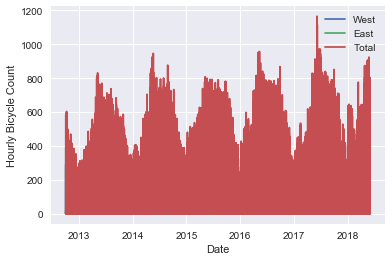

In [14]:
import matplotlib.pyplot as plt
data.plot()
plt.ylabel('Hourly Bicycle Count');


Text(0,0.5,'Weekly bicycle count')

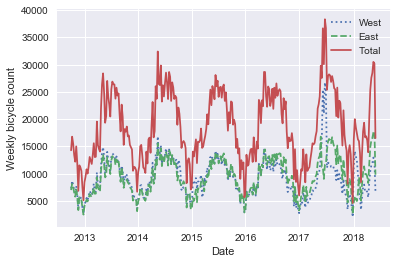

In [16]:
weekly=data.resample('W').sum()#resample the data by week
weekly.plot(style=[':','--','-'])
plt.ylabel('Weekly bicycle count')

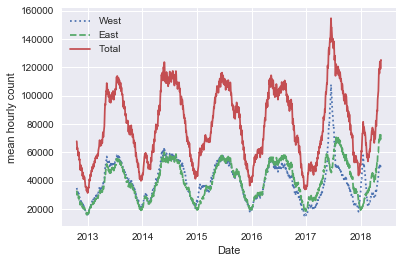

In [17]:
daily = data.resample('D').sum()#resample the data by month/30 days
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');


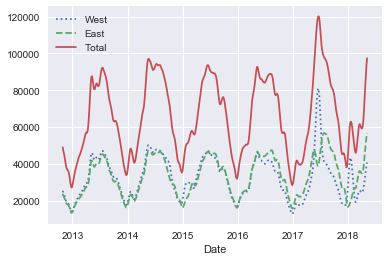

In [18]:
daily.rolling(50, center=True,#gaussian window function
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);


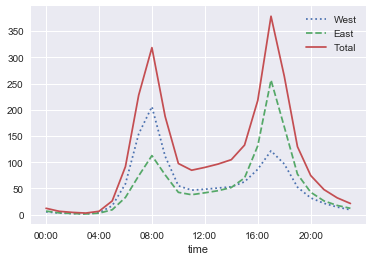

In [21]:
import numpy as np
by_time=data.groupby(data.index.time).mean()#average the traffic by day
hourly_ticks=4*60*60*np.arange(6)
by_time.plot(xticks=hourly_ticks,style=[':', '--', '-'])

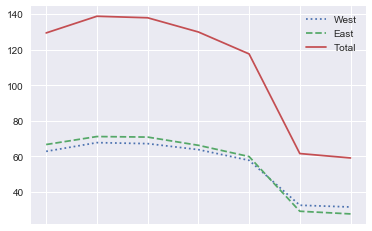

In [22]:
by_weekday = data.groupby(data.index.dayofweek).mean()#groupby mean of the day
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']#set new index
by_weekday.plot(style=[':', '--', '-']);

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


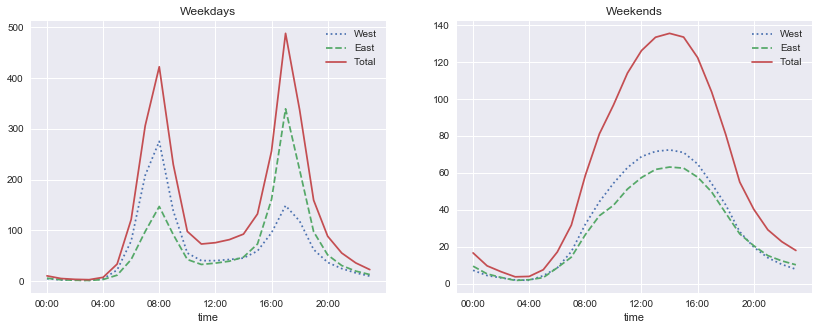

In [24]:
#compound groupby
import sys
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()
fig, ax = plt.subplots(1, 2, figsize=(14, 5)) 
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);


In [25]:
#high performance pandas
import numexpr #more efficient

In [34]:
rng = np.random.RandomState(42) 
x = rng.rand(7)
y = rng.rand(7)
mask=(x>0.5)&(y<0.5)
mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)')
np.allclose(mask, mask_numexpr)

True

In [35]:
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                      for i in range(4))

In [36]:
%timeit df1 + df2 + df3 + df4

117 ms ± 11.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
np.allclose(df1 + df2 + df3 + df4,
            pd.eval('df1 + df2 + df3 + df4'))


True

In [38]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3))) 
                           for i in range(5))

In [39]:
result1 = -df1 * df2 / (df3 + df4) - df5 #computation
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

In [40]:
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)#comparison
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

In [41]:
#eval for df
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

In [42]:
result3 = df.eval('(A + B) / (C - 1)')#even more succinct

In [43]:
df.eval('D = (A + B) / C', inplace=True)#assign df D
df.head()

,A,B,C,D
0,0.375506,0.406939,0.069938,11.187620
1,0.069087,0.235615,0.154374,1.973796
2,0.677945,0.433839,0.652324,1.704344
3,0.264038,0.808055,0.347197,3.087857
4,0.589161,0.252418,0.557789,1.508776


In [44]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')#@indicate variable
np.allclose(result1, result2)

True

In [45]:
#query method
result1 = df[(df.A < 0.5) & (df.B < 0.5)]

In [46]:
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

True

In [47]:
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(result1, result2)

True